## 1. Access the dataset called “convolution_test” in the directory provided by your instructor.

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

os.chdir(r'D:\Users\Ervie John\Documents\4th year 1st sem\Digital Signal Processing and Application\Module 6\Activity 5')
df = pd.read_csv("convolution test.csv")

### Creating result folder to save all results in this folder

In [18]:
import os
from os import path
import shutil

os.chdir(r'D:\Users\Ervie John\Documents\4th year 1st sem\Digital Signal Processing and Application\Module 6\Activity 5')
if (str(path.exists('Act5_Results')) != "True"): # checking if exist
    os.mkdir("Act5_Results") # if not, create folder
else: # if exist
    shutil.rmtree("Act5_Results") # remove folder
    os.mkdir("Act5_Results") # create folder
os.chdir(r'D:\Users\Ervie John\Documents\4th year 1st sem\Digital Signal Processing and Application\Module 6\Activity 5\Act5_Results')

## 2. The dataset should contain three(3) columns: A, B, and C. Store it in three separate data frames.

In [19]:
df.head(10)

,A,B,C
0,-0.000478,0.059634,0.05133
1,-0.000446,0.059641,0.05855
2,-0.000434,0.060458,0.01514
3,-0.000302,0.060385,0.02776
4,-0.000476,0.059634,0.01171
5,-0.000407,0.059987,0.03690
6,-0.000614,0.059554,0.01482
7,-0.000258,0.059943,0.02954
8,-0.000246,0.059742,0.01659
9,-0.000407,0.059870,0.01524


## 3. Develop a program that demonstrates and proves the mathematical properties of convolution, specifically:

In [20]:
A = np.array(df["A"])
B = np.array(df["B"])
C = np.array(df["C"])

def arrayChecker(Array1, Array2):
    if(len(Array1) == len(Array2)):
        #check = None
        for i in range(len(Array1)):
            if(Array1[i] != Array2[i]):
            #if("{:.18f}".format(Array1[i]) != "{:.18f}".format(Array2[i])):
                #print("array1: ", Array1[i])
                #print("array2: ", Array2[i])
                #check = False
                return "Not Equal"
                #break    
        else:
            return "Equal"
    else:
        return "Not Equal"

<div align="center"> <h2>Commutative Property </h2> </div>
<div align="center"> <img src="https://render.githubusercontent.com/render/math?math=A[n] * B[n] = B[n] * A[n]"  width="350"/> </div>

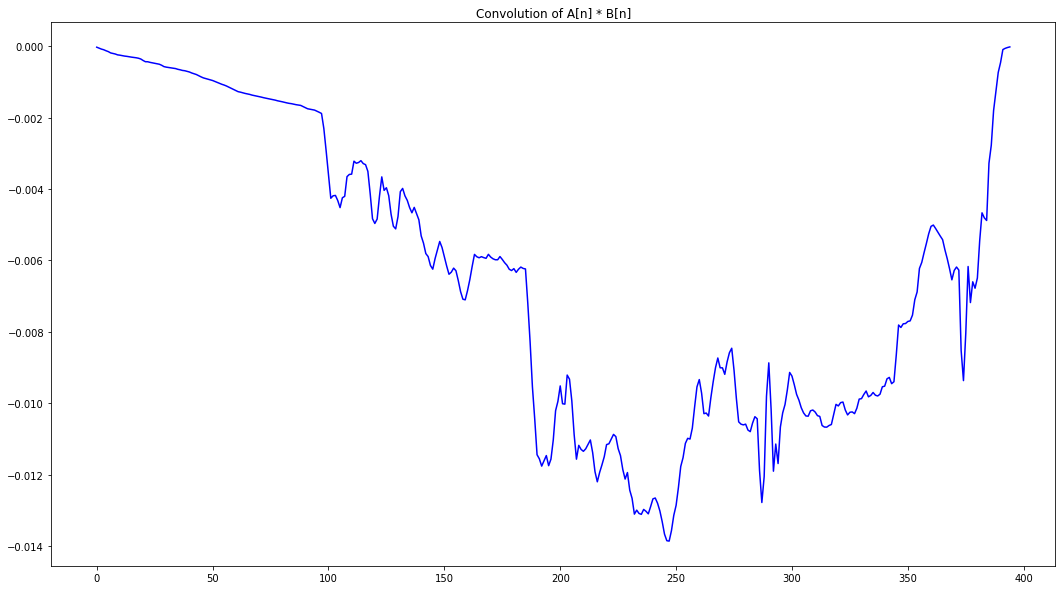

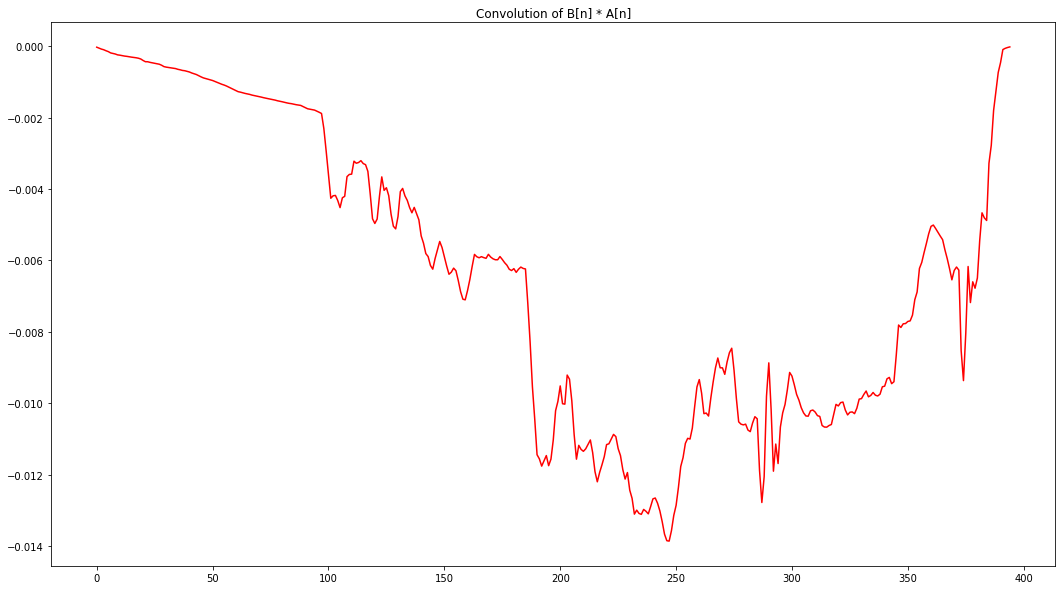

The equation A[n] * B[n] = B[n] * A[n] is Not Equal


In [21]:
convAB = np.convolve(A, B)
convBA = np.convolve(B, A)
#print(convAB)

plt.figure(1,figsize=(18,10))
plt.title('Convolution of A[n] * B[n]')
plt.plot(convAB, color='blue')
#plt.legend(('Convolution of A and B'))
plt.savefig('Commutative_ConvolutionOf_AandB.png', transparent=False, facecolor='white')
plt.show()

plt.figure(2,figsize=(18,10))
plt.title('Convolution of B[n] * A[n]')
plt.plot(convBA, color='red')
#plt.legend(('Convolution of B and A'))
plt.savefig('Commutative_ConvolutionOf_BandA.png', transparent=False, facecolor='white')
plt.show()

print("The equation A[n] * B[n] = B[n] * A[n] is", arrayChecker(convAB, convBA))

<div align="center"> <h2>Associative Property </h2> </div>
<div align="center"> <img src="https://render.githubusercontent.com/render/math?math=(A[n] * B[n]) * C[n] = A[n] * (B[n] * C[n]) "  width="450"/> </div>

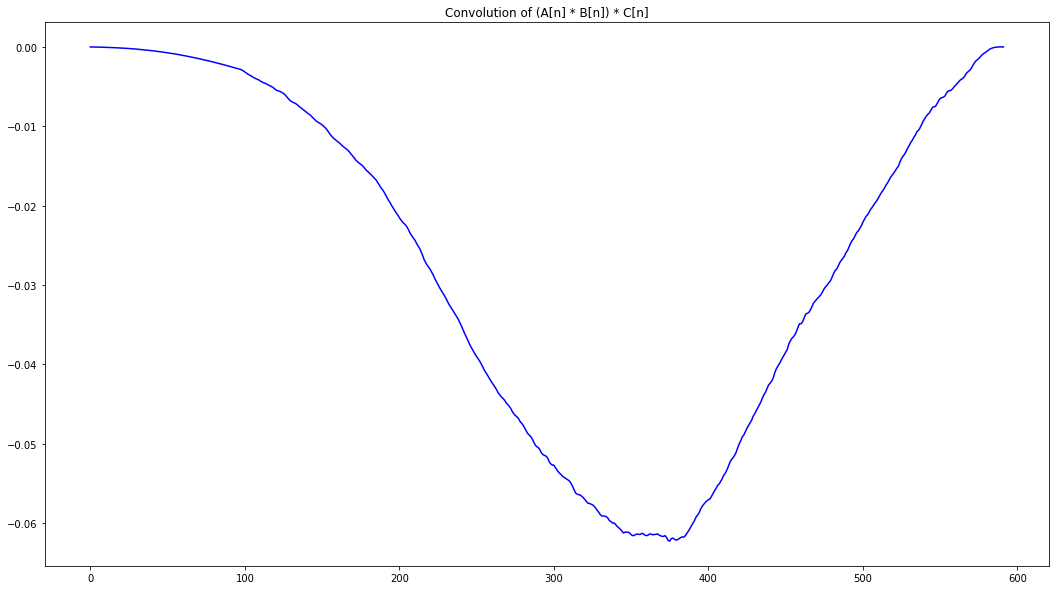

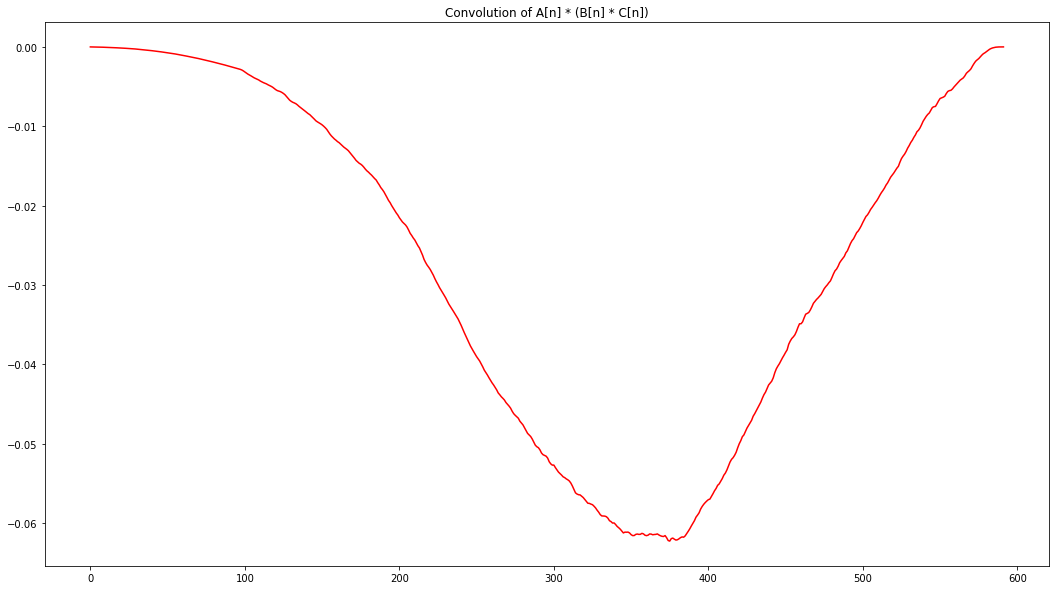

The equation A[n] * B[n] = B[n] * A[n] is Not Equal


In [22]:
convAB = np.convolve(A, B)
convAB_C = np.convolve(convAB, C) # first equation
convBC = np.convolve(B, C)
convA_BC = np.convolve(A, convBC) # second equation
#print(convAB)

plt.figure(1,figsize=(18,10))
plt.title('Convolution of (A[n] * B[n]) * C[n]')
plt.plot(convAB_C, color='blue')
plt.savefig('Associative_ConvolutionOf_ABandC.png', transparent=False, facecolor='white')
plt.show()

plt.figure(2,figsize=(18,10))
plt.title('Convolution of A[n] * (B[n] * C[n])')
plt.plot(convA_BC, color='red')
plt.savefig('Associative_ConvolutionOf_AandBC.png', transparent=False, facecolor='white')
plt.show()

print("The equation A[n] * B[n] = B[n] * A[n] is", arrayChecker(convAB_C, convA_BC))

<div align="center"> <h2>Distributive Property </h2> </div>
<div align="center"> <h1>A[n] * B[n] + A[n] * C[n] = A[n] * (B[n] + C[n]) </h1> </div>


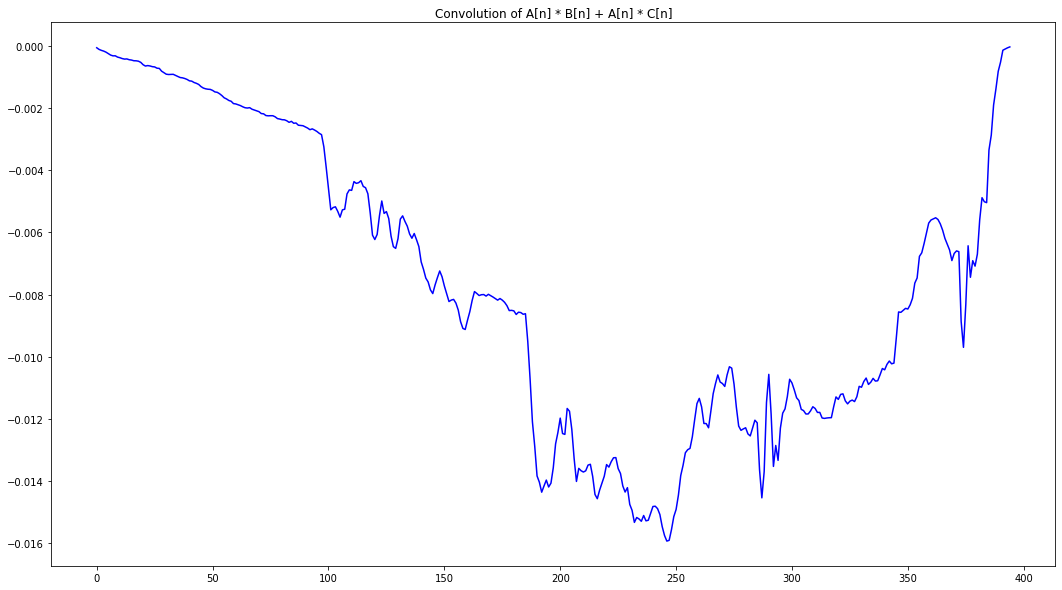

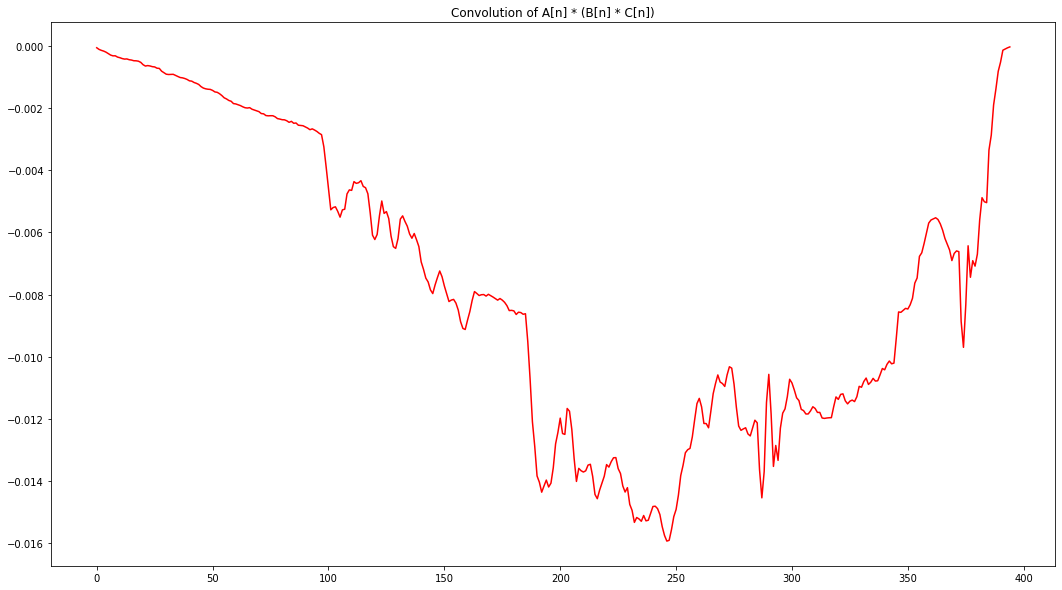

The equation A[n] * B[n] + A[n] * C[n] = A[n] * (B[n] * C[n]) is Not Equal


In [23]:
convAB = np.convolve(A, B) # A[n] * B[n]
convAC = np.convolve(A, C) # A[n] * C[n]
sumAB_AC = np.add(convAB,convAC) # A[n] * B[n] + A[n] * C[n] , first equation
sumBC = np.add(B, C) # B[n] + C[n]
convA_sumBC = np.convolve(A, sumBC) # A[n] * (B[n] * C[n]) , second equation

plt.figure(1,figsize=(18,10))
plt.title('Convolution of A[n] * B[n] + A[n] * C[n]')
plt.plot(sumAB_AC, color='blue')
plt.savefig('Distributive_ConvolutionOf1stEq.png', transparent=False, facecolor='white')
plt.show()

plt.figure(2,figsize=(18,10))
plt.title('Convolution of A[n] * (B[n] * C[n])')
plt.plot(convA_sumBC, color='red')
plt.savefig('Distributive_ConvolutionOf2ndEq.png', transparent=False, facecolor='white')
plt.show()

print("The equation A[n] * B[n] + A[n] * C[n] = A[n] * (B[n] * C[n]) is", arrayChecker(sumAB_AC, convA_BC))

<div align="center"> <h2>Transference Property </h2> </div>
<div align="center"> <h1>(x[n] * h[n])*(same linear change) = x[n]*(linear change) * h[n] </h1> </div>


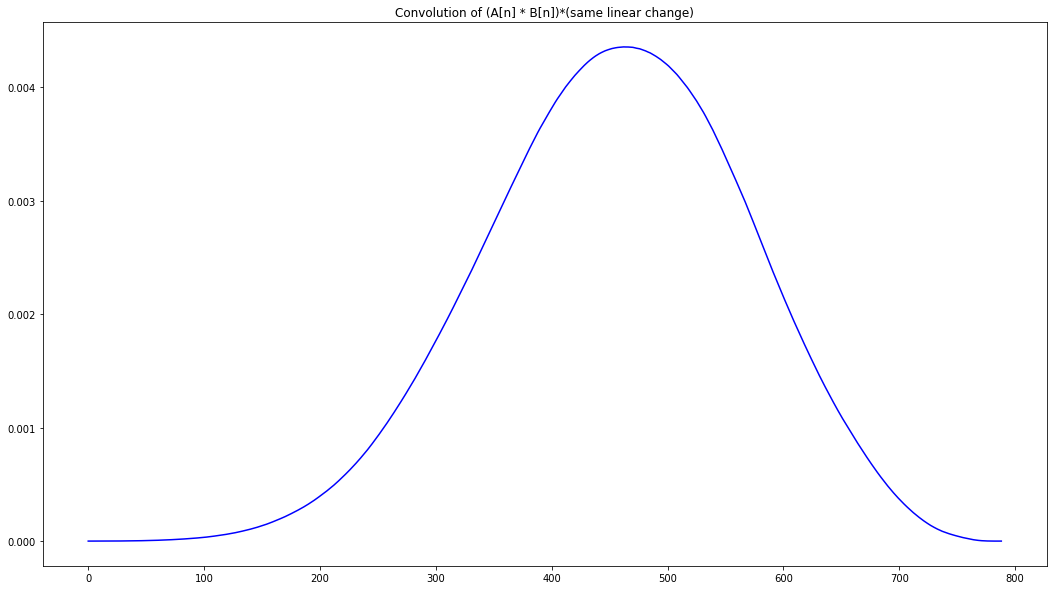

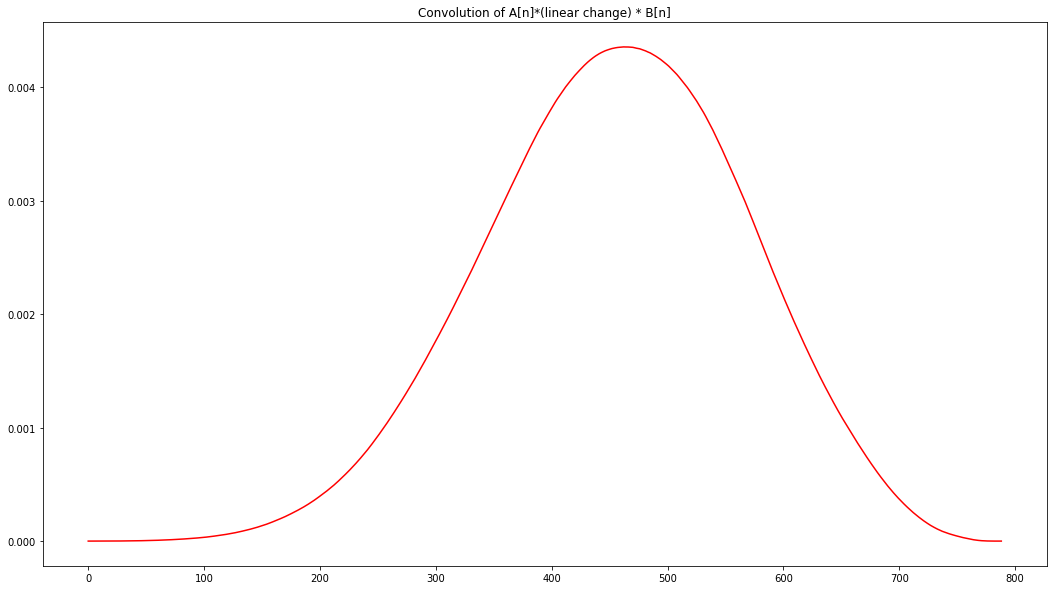

The equation (x[n] * h[n])*(same linear change) = x[n]*(linear change) * h[n] is Equal


In [24]:
linear = np.convolve(C, A) # linear change

convAB = np.convolve(A, B) # A[n] * B[n] 
convA_linear = np.convolve(A,linear) # A[n] * C
convA_linear_B = np.convolve(convAB, linear) # first equation
ConvAB_linear = np.convolve(convAB, linear) # second equation

plt.figure(1,figsize=(18,10))
plt.title('Convolution of (A[n] * B[n])*(same linear change)')
plt.plot(convA_linear_B, color='blue')
plt.savefig('Transference_ConvolutionOf1stEq.png', transparent=False, facecolor='white')
plt.show()

plt.figure(2,figsize=(18,10))
plt.title('Convolution of A[n]*(linear change) * B[n]')
plt.plot(ConvAB_linear, color='red')
plt.savefig('Transference_ConvolutionOf2ndEq.png', transparent=False, facecolor='white')
plt.show()

print("The equation (x[n] * h[n])*(same linear change) = x[n]*(linear change) * h[n] is", arrayChecker(convA_linear_B, ConvAB_linear))

## 4. Record your observations and provide an analysis of their functions.

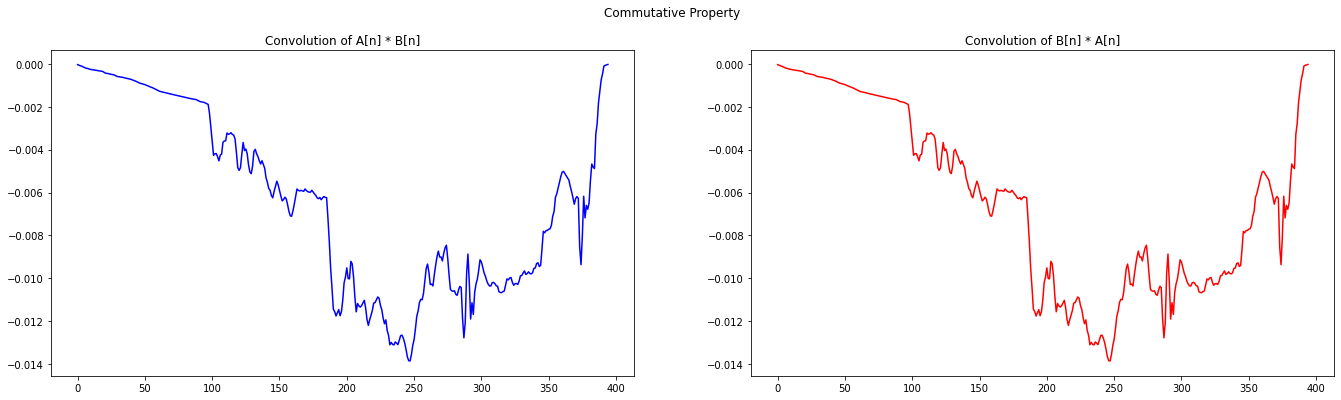

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23,6))
fig.suptitle('Commutative Property')
ax1.set_title("Convolution of A[n] * B[n]")
ax1.plot(convAB, color="blue")
ax2.set_title("Convolution of B[n] * A[n]")
ax2.plot(convBA, color="red")
plt.savefig('CommutativeProperty.png', transparent=False, facecolor='white')

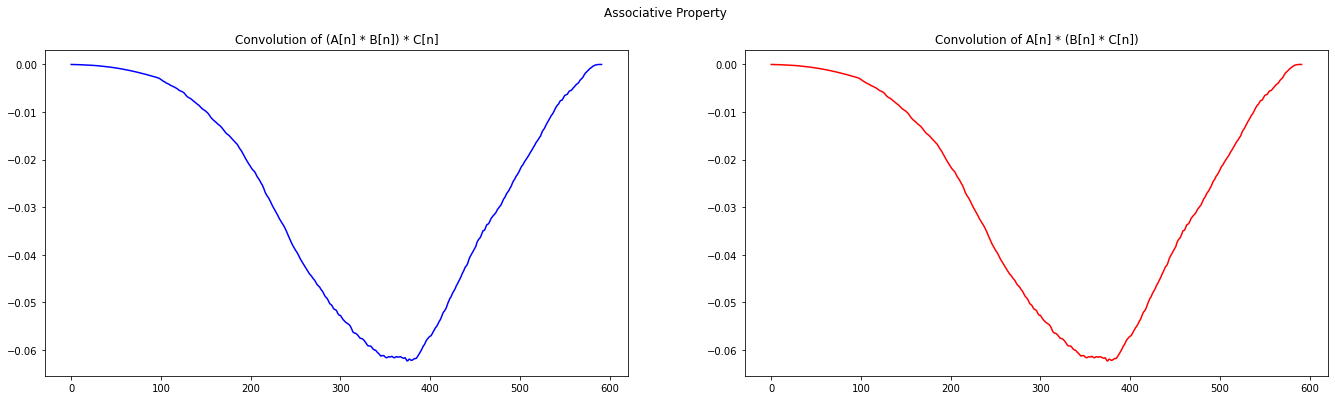

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23,6))
fig.suptitle('Associative Property')
ax1.set_title("Convolution of (A[n] * B[n]) * C[n]")
ax1.plot(convAB_C, color="blue")
ax2.set_title("Convolution of A[n] * (B[n] * C[n])")
ax2.plot(convA_BC, color="red")
plt.savefig('AssociativeProperty.png', transparent=False, facecolor='white')

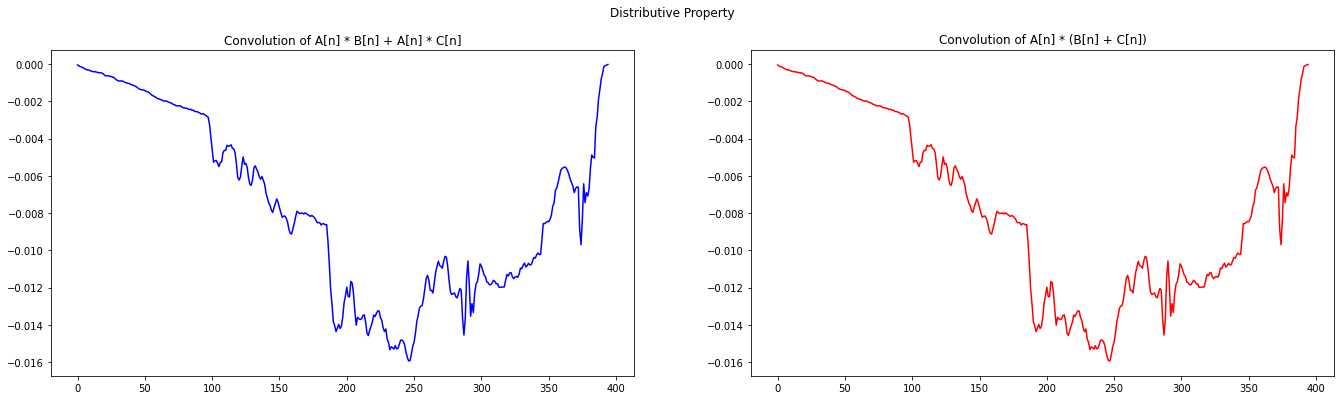

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23,6))
fig.suptitle('Distributive Property')
ax1.set_title("Convolution of A[n] * B[n] + A[n] * C[n]")
ax1.plot(sumAB_AC, color="blue")
ax2.set_title("Convolution of A[n] * (B[n] + C[n])")
ax2.plot(convA_sumBC, color="red")
plt.savefig('DistributiveProperty.png', transparent=False, facecolor='white')

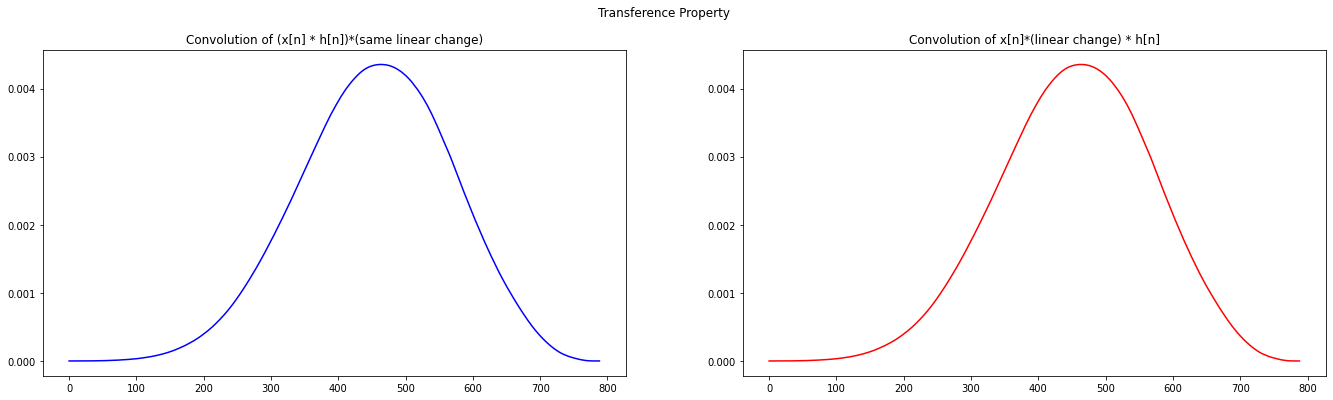

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23,6))
fig.suptitle('Transference Property')
ax1.set_title("Convolution of (x[n] * h[n])*(same linear change)")
ax1.plot(ConvAB_linear, color="blue")
ax2.set_title("Convolution of x[n]*(linear change) * h[n]")
ax2.plot(convA_linear_B, color="red")
plt.savefig('TransferenceProperty.png', transparent=False, facecolor='white')

## 5. Extra: Try convolving each data frames with itself for multiple of times. Observe.

### A Column

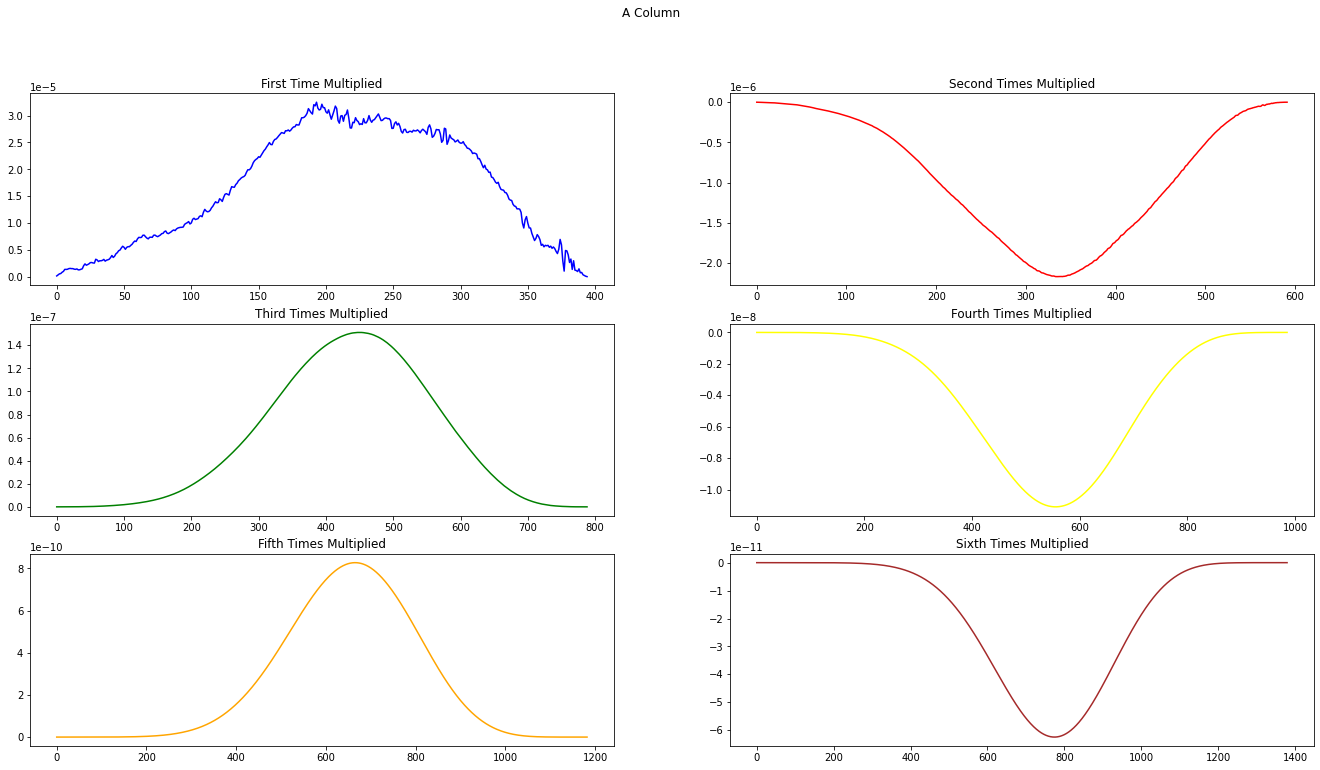

In [29]:
fig, (ax) = plt.subplots(3, 2, figsize=(23,12))


fig.suptitle('A Column')
resultA = np.convolve(A, A)
ax[0,0].set_title("First Time Multiplied")
ax[0,0].plot(resultA, color="blue")

resultA = np.convolve(resultA, A)
ax[0,1].set_title("Second Times Multiplied")
ax[0,1].plot(resultA, color="red")

resultA = np.convolve(resultA, A)
ax[1,0].set_title("Third Times Multiplied")
ax[1,0].plot(resultA, color="green")

resultA = np.convolve(resultA, A)
ax[1,1].set_title("Fourth Times Multiplied")
ax[1,1].plot(resultA, color="yellow")

resultA = np.convolve(resultA, A)
ax[2,0].set_title("Fifth Times Multiplied")
ax[2,0].plot(resultA, color="orange")

resultA = np.convolve(resultA, A)
ax[2,1].set_title("Sixth Times Multiplied")
ax[2,1].plot(resultA, color="brown")

plt.savefig('A_Multiplied.png', transparent=False, facecolor='white')

### B Column

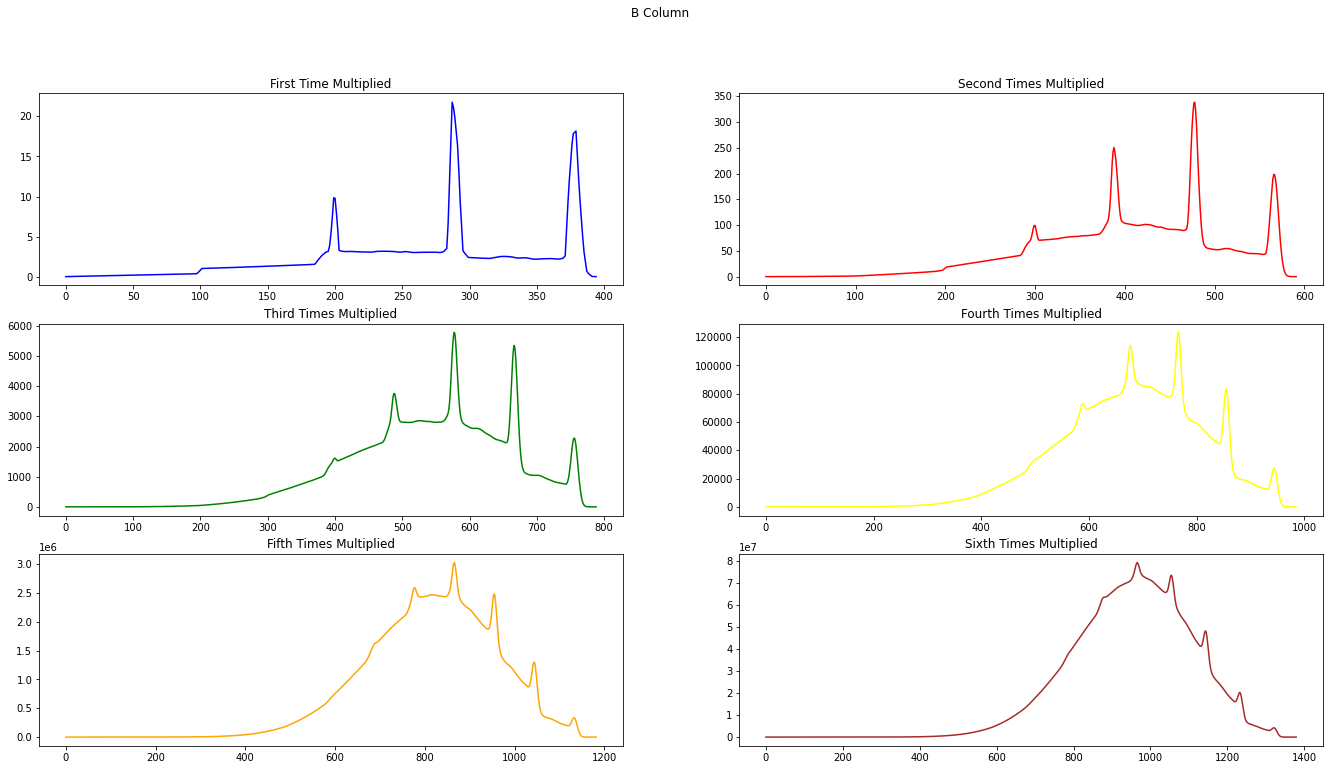

In [30]:
fig, (ax) = plt.subplots(3, 2, figsize=(23,12))


fig.suptitle('B Column')
resultB = np.convolve(B, B)
ax[0,0].set_title("First Time Multiplied")
ax[0,0].plot(resultB, color="blue")

resultB = np.convolve(resultB, B)
ax[0,1].set_title("Second Times Multiplied")
ax[0,1].plot(resultB, color="red")

resultB = np.convolve(resultB, B)
ax[1,0].set_title("Third Times Multiplied")
ax[1,0].plot(resultB, color="green")

resultB = np.convolve(resultB, B)
ax[1,1].set_title("Fourth Times Multiplied")
ax[1,1].plot(resultB, color="yellow")

resultB = np.convolve(resultB, B)
ax[2,0].set_title("Fifth Times Multiplied")
ax[2,0].plot(resultB, color="orange")

resultB = np.convolve(resultB, B)
ax[2,1].set_title("Sixth Times Multiplied")
ax[2,1].plot(resultB, color="brown")

plt.savefig('B_Multiplied.png', transparent=False, facecolor='white')

### C Column

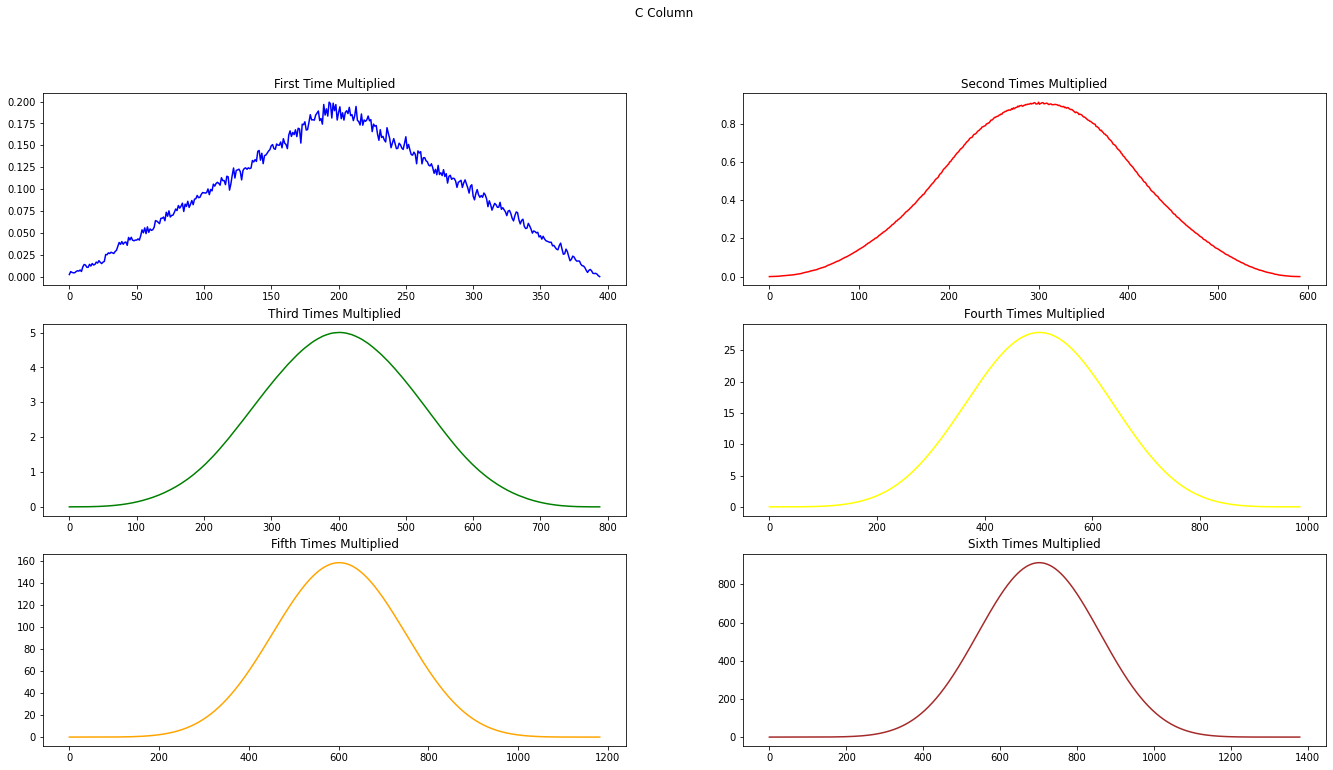

In [31]:
fig, (ax) = plt.subplots(3, 2, figsize=(23,12))


fig.suptitle('C Column')
resultC = np.convolve(C, C)
ax[0,0].set_title("First Time Multiplied")
ax[0,0].plot(resultC, color="blue")

resultC = np.convolve(resultC, C)
ax[0,1].set_title("Second Times Multiplied")
ax[0,1].plot(resultC, color="red")

resultC = np.convolve(resultC, C)
ax[1,0].set_title("Third Times Multiplied")
ax[1,0].plot(resultC, color="green")

resultC = np.convolve(resultC, C)
ax[1,1].set_title("Fourth Times Multiplied")
ax[1,1].plot(resultC, color="yellow")

resultC = np.convolve(resultC, C)
ax[2,0].set_title("Fifth Times Multiplied")
ax[2,0].plot(resultC, color="orange")

resultC = np.convolve(resultC, C)
ax[2,1].set_title("Sixth Times Multiplied")
ax[2,1].plot(resultC, color="brown")

plt.savefig('C_Multiplied.png', transparent=False, facecolor='white')